In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# DATASET_URL = "https://raw.githubusercontent.com/eric-minassian/rotten-tomatoes-dataset/main/movie_dataset.csv"
# df = pd.read_csv(DATASET_URL)
df = pd.read_csv("dataset.csv")

# Name the first column id
df.columns.values[0] = "id"

df.head()

,id,title,description,audience_score_average_rating,audience_score_liked_count,audience_score_not_liked_count,audience_score_review_count,audience_score_score,audience_score_sentiment,critic_score_average_rating,...,distributor,production_company,genre,sound_mix,rating,original_language,release_date_theater,release_date_streaming,runtime,box_office
0,xoxo_2016,XOXO,The lives of six strangers collide during a fr...,3.3,211.0,192.0,76.0,52.0,NEGATIVE,5.8,...,NaN,['Netflix'],['Comedy'],NaN,TV-MA,English,NaN,"May 23, 2017",1h 32m,NaN
1,angelina_ballerina_sweet_valentine_2012,Angelina Ballerina: Sweet Valentine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fufu,Husband and Wife,After learning he has just a few months to liv...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"['Comedy', 'Drama']",NaN,NaN,Chinese,NaN,NaN,1h 20m,NaN
3,outatime_saving_the_delorean_time_machine,OUTATIME: Saving the DeLorean Time Machine,The world's most famous movie car is plagued b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,['Cricket Pictures'],['Documentary'],NaN,NaN,English,NaN,"Aug 2, 2016",1h 4m,NaN
4,women_of_the_night,Women of the Night,A lover's infidelity with her sister shakes Fu...,3.8,36.0,9.0,22.0,80.0,POSITIVE,NaN,...,NaN,NaN,['Drama'],NaN,NaN,Japanese,NaN,NaN,1h 45m,NaN


In [3]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92911 entries, 0 to 92910
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              92911 non-null  object 
 1   title                           92911 non-null  object 
 2   description                     85317 non-null  object 
 3   audience_score_average_rating   49150 non-null  float64
 4   audience_score_liked_count      49150 non-null  float64
 5   audience_score_not_liked_count  49150 non-null  float64
 6   audience_score_review_count     49150 non-null  float64
 7   audience_score_score            49150 non-null  float64
 8   audience_score_sentiment        49150 non-null  object 
 9   critic_score_average_rating     22164 non-null  float64
 10  critic_score_liked_count        22379 non-null  float64
 11  critic_score_not_liked_count    22379 non-null  float64
 12  critic_score_review_count       

In [4]:
# Percentage of missing values in each column
missing_values = df.isnull().mean() * 100

missing_values

id                                 0.000000
title                              0.000000
description                        8.173413
audience_score_average_rating     47.099913
audience_score_liked_count        47.099913
audience_score_not_liked_count    47.099913
audience_score_review_count       47.099913
audience_score_score              47.099913
audience_score_sentiment          47.099913
critic_score_average_rating       76.144913
critic_score_liked_count          75.913509
critic_score_not_liked_count      75.913509
critic_score_review_count         75.913509
critic_score_score                75.913509
critic_score_sentiment            75.913509
director                           2.282830
producer                          38.003035
screenwriter                      35.119631
distributor                       83.492805
production_company                50.327733
genre                              7.280085
sound_mix                         88.719312
rating                          

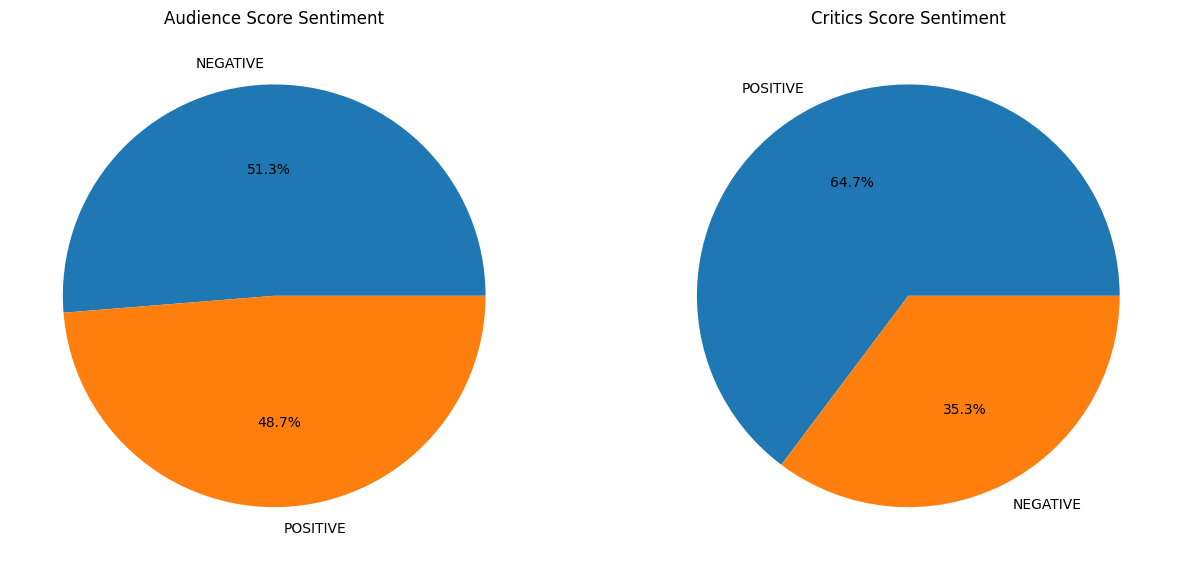

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Audience Score Sentiment
audience_score_sentiment = df["audience_score_sentiment"].value_counts()
ax[0].pie(audience_score_sentiment, labels=audience_score_sentiment.index, autopct="%1.1f%%")
ax[0].set_title("Audience Score Sentiment")

# Critics Score Sentiment
critics_score_sentiment = df["critic_score_sentiment"].value_counts()
ax[1].pie(critics_score_sentiment, labels=critics_score_sentiment.index, autopct="%1.1f%%")
ax[1].set_title("Critics Score Sentiment")

plt.show()

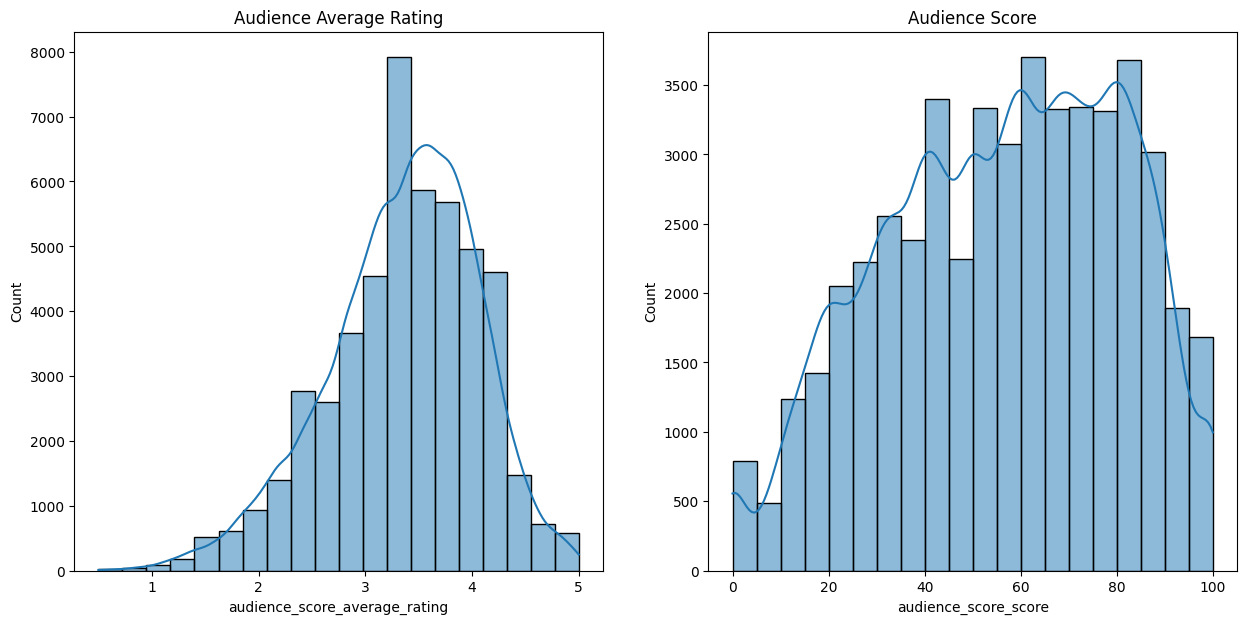

In [6]:
# Distribution of Audience Score
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Audience Average Score
sns.histplot(df["audience_score_average_rating"], bins=20, ax=ax[0], kde=True)
ax[0].set_title("Audience Average Rating")

# Audience Score
sns.histplot(df["audience_score_score"], bins=20, ax=ax[1], kde=True)
ax[1].set_title("Audience Score")

plt.show()

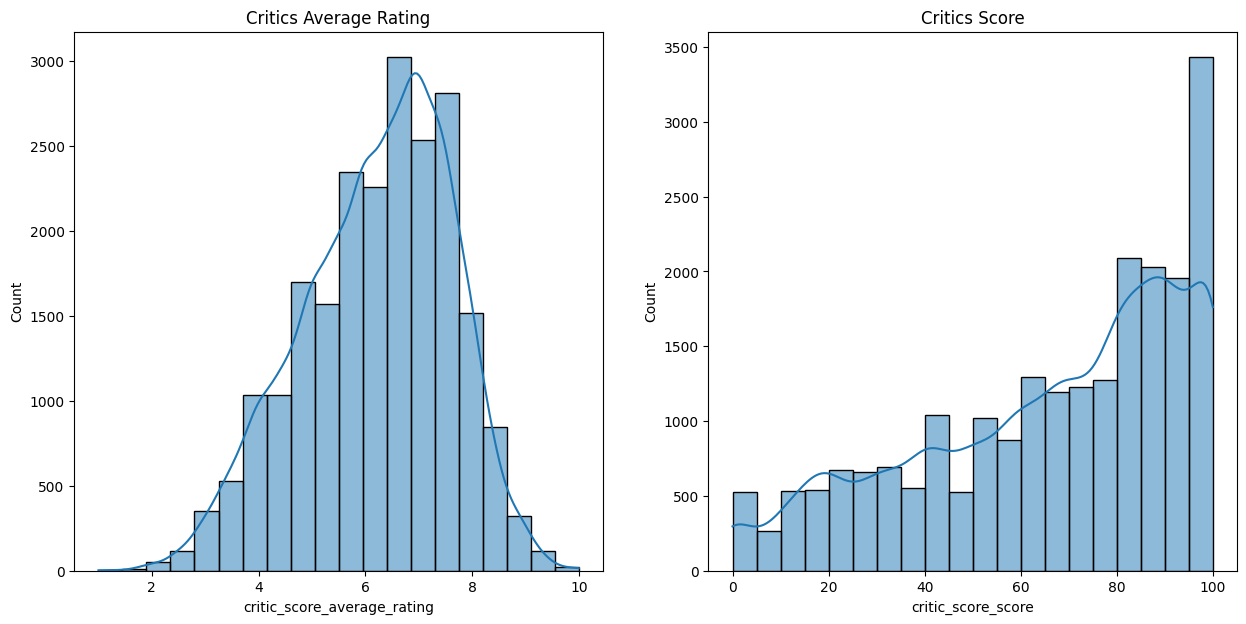

In [7]:
# Distribution of Critics Score
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Critics Average Score
sns.histplot(df["critic_score_average_rating"], bins=20, ax=ax[0], kde=True)
ax[0].set_title("Critics Average Rating")

# Critics Score
sns.histplot(df["critic_score_score"], bins=20, ax=ax[1], kde=True)
ax[1].set_title("Critics Score")

plt.show()

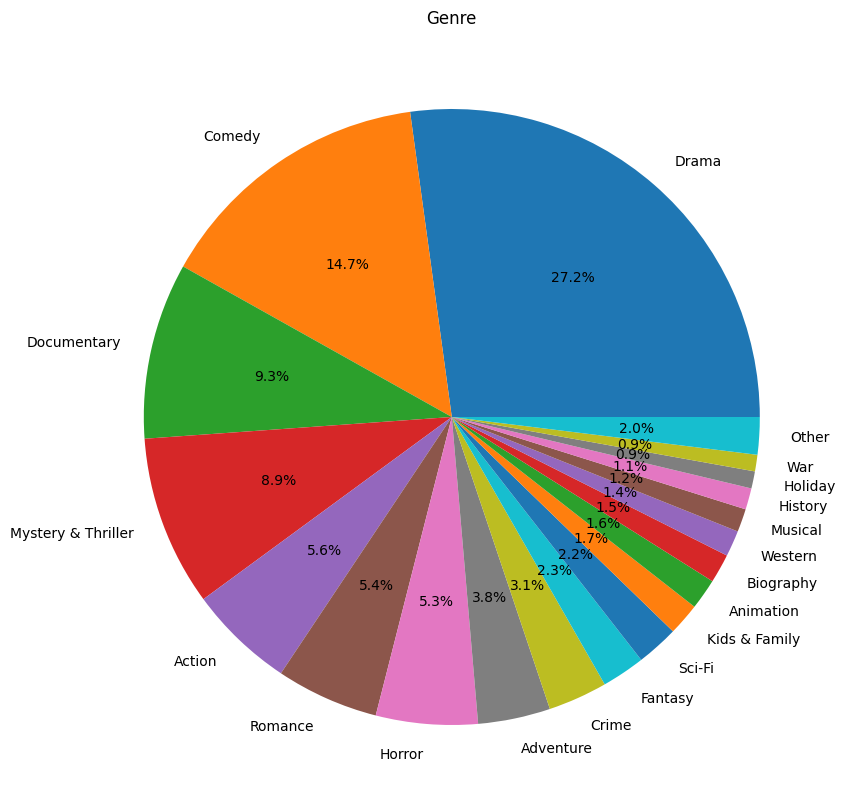

In [8]:
# Distribution of Genre (Pie Chart)
# genre is a JSON object, we need to convert it to a list
# and then explode it to get the count of each genre
def json_to_list(x: str) -> list:
    try:
        return json.loads(x.replace("'", "\""))
    except:
        return []

df["genre"] = df["genre"].apply(json_to_list)
genre = df.explode("genre")["genre"].value_counts()

# Combine less frequent genres into "Other"
threshold = 1_000
other = genre[genre < threshold].sum()
genre = genre[genre >= threshold]
genre["Other"] = other

plt.figure(figsize=(10, 10))
plt.pie(genre, labels=genre.index, autopct="%1.1f%%")
plt.title("Genre")
plt.show()


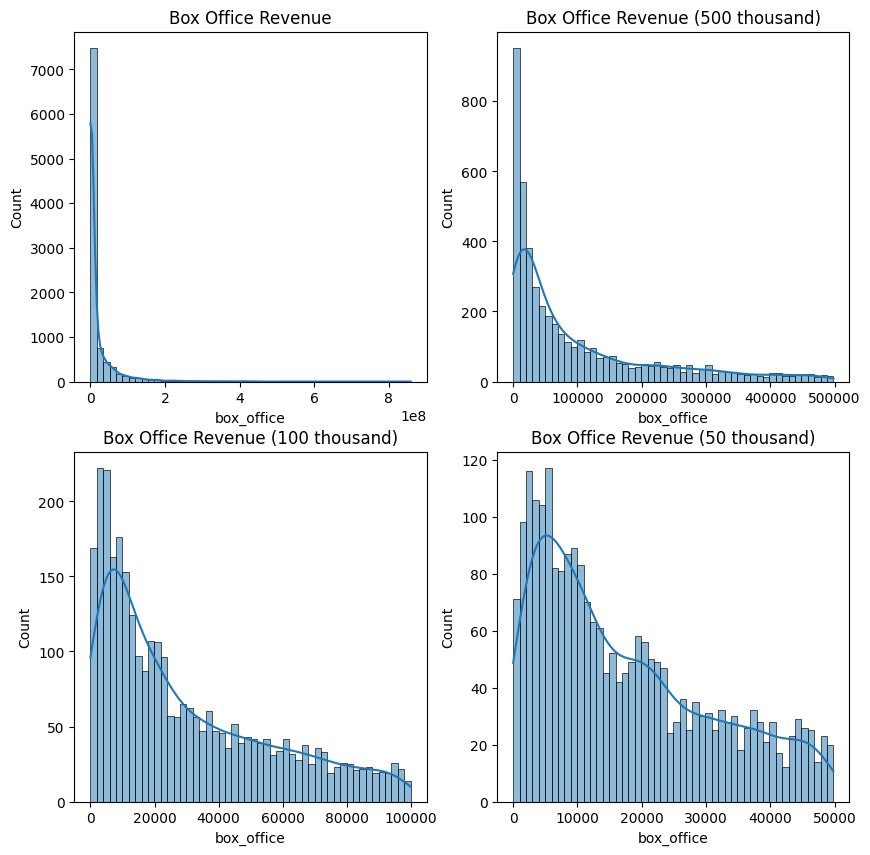

In [9]:
# Categorize of Box Office Revenue
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Box Office Revenue
sns.histplot(df["box_office"], bins=50, kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Box Office Revenue")

# Box Office Revenue (500 thousand)
sns.histplot(df[df["box_office"] < 500000]["box_office"], bins=50, kde=True, ax=ax[0, 1])
ax[0, 1].ticklabel_format(style="plain", axis="x")
ax[0, 1].set_title("Box Office Revenue (500 thousand)")

# Box Office Revenue (100 thousand)
sns.histplot(df[df["box_office"] < 100000]["box_office"], bins=50, kde=True, ax=ax[1, 0])
ax[1, 0].ticklabel_format(style="plain", axis="x")
ax[1, 0].set_title("Box Office Revenue (100 thousand)")

# Box Office Revenue (50 thousand)
sns.histplot(df[df["box_office"] < 50000]["box_office"], bins=50, kde=True, ax=ax[1, 1])
ax[1, 1].ticklabel_format(style="plain", axis="x")
ax[1, 1].set_title("Box Office Revenue (50 thousand)")

plt.show()


Correlation between Audience Score and Box Office Gross: 0.10020727668247512


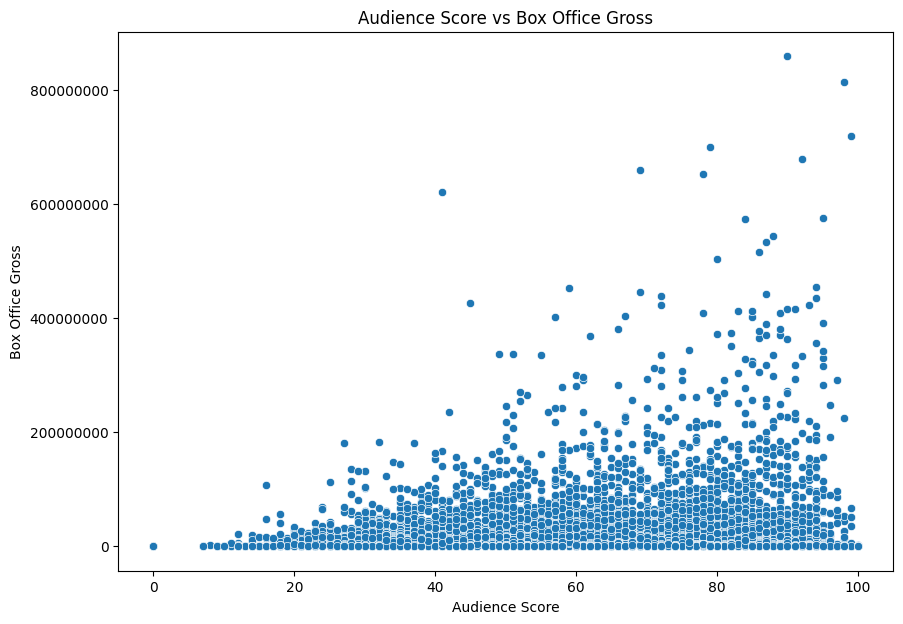

In [10]:
# Correlation between Audience Score and Box Office Gross
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df["audience_score_score"], y=df["box_office"])
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("Box Office Gross")
plt.xlabel("Audience Score")
plt.title("Audience Score vs Box Office Gross")

# Find the correlation between Audience Score and Box Office Gross
correlation = df["audience_score_score"].corr(df["box_office"])
print(f"Correlation between Audience Score and Box Office Gross: {correlation}")

plt.show()



Correlation between Critics Score and Box Office Gross: 0.0018858007865059714


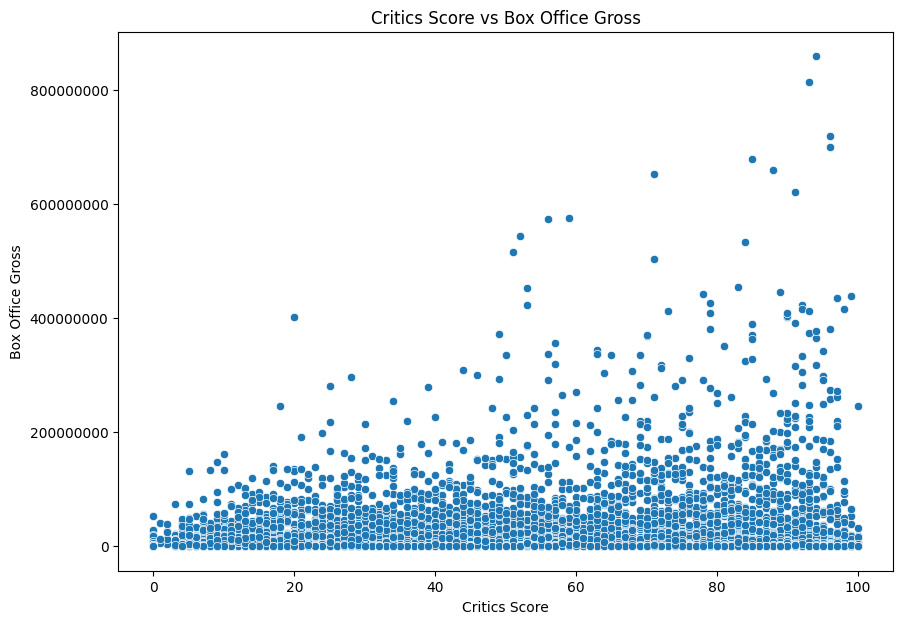

In [11]:
# Correlation between Critics Score and Box Office Gross
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df["critic_score_score"], y=df["box_office"])
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("Box Office Gross")
plt.xlabel("Critics Score")
plt.title("Critics Score vs Box Office Gross")

# Find the correlation between Critics Score and Box Office Gross
correlation = df["critic_score_score"].corr(df["box_office"])
print(f"Correlation between Critics Score and Box Office Gross: {correlation}")

plt.show()


Correlation between Audience Score and Critics Score: 0.5991249740326235


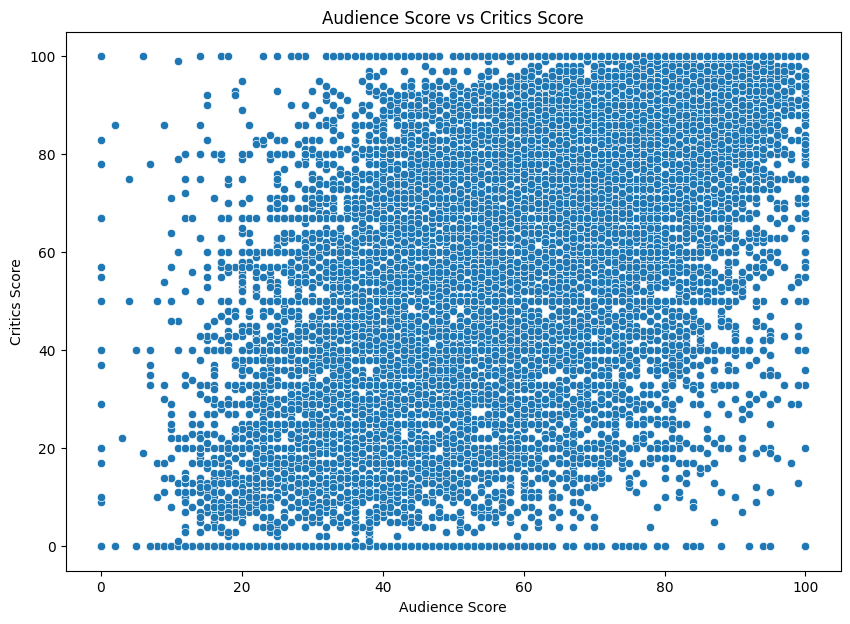

In [12]:
# Correlation between Audience Score and Critics Score
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df["audience_score_score"], y=df["critic_score_score"])
plt.ylabel("Critics Score")
plt.xlabel("Audience Score")
plt.title("Audience Score vs Critics Score")

# Find the correlation between Audience Score and Critics Score
correlation = df["audience_score_score"].corr(df["critic_score_score"])
print(f"Correlation between Audience Score and Critics Score: {correlation}")

plt.show()
